In [ ]:
#Unzip Files
!unzip Archive

In [5]:
#checking for Folder!
!ls

Archive  Archive.zip  sample_data


In [8]:
#Viewing Random Images for checking of pests and diseases
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (256, 256, 3)


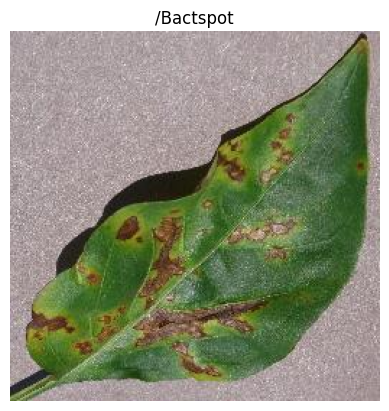

In [10]:
img = view_random_image(target_dir="Archive/train",target_class="/Bactspot")

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "Archive/train/"
test_dir = "Archive/test/"

In [19]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224, 224),class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224, 224),class_mode="binary",seed=42)

Found 2475 images belonging to 2 classes.
Found 2475 images belonging to 2 classes.


In [20]:

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


In [21]:
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
78/78 [==============================] - 12s 125ms/step - loss: 0.5337 - accuracy: 0.7572 - val_loss: 0.3367 - val_accuracy: 0.8695
Epoch 2/5
78/78 [==============================] - 8s 103ms/step - loss: 0.2985 - accuracy: 0.8752 - val_loss: 0.3296 - val_accuracy: 0.8549
Epoch 3/5
78/78 [==============================] - 9s 113ms/step - loss: 0.1984 - accuracy: 0.9305 - val_loss: 0.1499 - val_accuracy: 0.9568
Epoch 4/5
78/78 [==============================] - 9s 114ms/step - loss: 0.1607 - accuracy: 0.9434 - val_loss: 0.1118 - val_accuracy: 0.9689
Epoch 5/5
78/78 [==============================] - 10s 124ms/step - loss: 0.1263 - accuracy: 0.9560 - val_loss: 0.1081 - val_accuracy: 0.9758


In [22]:
#preparation for prediction!
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [27]:
Image = load_and_prep_image("Defect.jpg")
Image = tf.expand_dims(Image, axis=0)
model.predict(Image)

1/1 [==============================] - 0s 268ms/step


array([[1.264684e-05]], dtype=float32)

In [43]:
imgx="Leafy.jpg"
Image = load_and_prep_image(imgx)
Image = tf.expand_dims(Image, axis=0)
x=model.predict(Image)[0]
if x>=0.5:
  val="Healthy"
else:
  val="Infected"
print(val)


1/1 [==============================] - 0s 38ms/step
Infected


Text(0.5, 1.0, 'Infected')

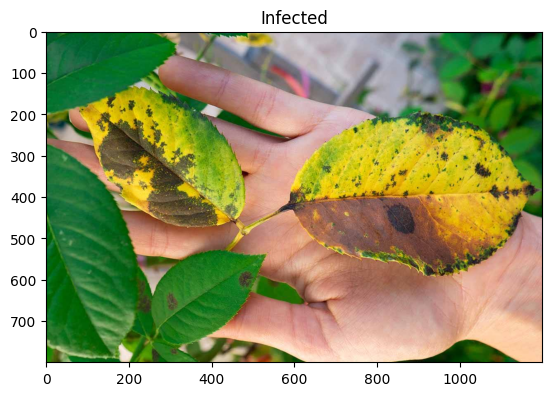

In [44]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
Image = img.imread(imgx)
# displaying the image
plt.imshow(Image)
plt.title(val)